# 1. Import libreries

In [1]:
import warnings
import statistics as stat
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report,recall_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb


# 2. Load and drop useless columns

In [2]:
df_bank = pd.read_csv("BankChurners.csv")

In [3]:
df_bank.drop(['CLIENTNUM', 'Unnamed: 21'], axis = 'columns', inplace=True)

# 3. Exploding, search null, duplicates and modify some columns 

## 3.1 Shape of data

In [4]:
df_bank.shape

(10127, 20)

## 3.2 Types of data

In [5]:
df_bank.dtypes,df_bank.shape                   

(Attrition_Flag               object
 Customer_Age                  int64
 Gender                       object
 Dependent_count               int64
 Education_Level              object
 Marital_Status               object
 Income_Category              object
 Card_Category                object
 Months_on_book                int64
 Total_Relationship_Count      int64
 Months_Inactive_12_mon        int64
 Contacts_Count_12_mon         int64
 Credit_Limit                float64
 Total_Revolving_Bal           int64
 Avg_Open_To_Buy             float64
 Total_Amt_Chng_Q4_Q1        float64
 Total_Trans_Amt               int64
 Total_Trans_Ct                int64
 Total_Ct_Chng_Q4_Q1         float64
 Avg_Utilization_Ratio       float64
 dtype: object,
 (10127, 20))

## 3.3 Statistical data

### 3.3.1 Numerical values

In [6]:
df_bank.describe(include=None)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### 3.3.2 Categorical values

In [7]:
df_bank.describe(include=[object])  

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## 3.4 looking for null values

In [8]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
df_bank.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## 3.5 Looking for duplicate values

In [10]:
df_bank.duplicated().sum()

0

## 3.6 Modify some columns 

In [11]:
df_bank["Attrition_Flag"]=df_bank["Attrition_Flag"].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_bank["Gender"]=df_bank["Gender"].map({'M': 1, 'F': 0})

# 4.Feature enginnering and selection

## 4.1 Split in study variable and features

In [12]:
target = df_bank["Attrition_Flag"]

data = df_bank.drop(columns=["Attrition_Flag"])

## 4.2 Split in training data and test data

In [13]:
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(data,target,test_size=0.30,random_state=41)

In [14]:
datos_prueba.shape,clase_prueba.shape

((3039, 19), (3039,))

## 4.3 Transform training set

In [15]:
df = datos_entrena
df2 = datos_prueba

## 4.3.1 Separate numerical and categorical data

### 4.3.1.1 Categorical data

##### 4.3.1.1.1 Categorical data training

In [16]:
categoricos_entreno = df.loc[:,df.dtypes==np.object]
categoricos_entreno2 = categoricos_entreno.reset_index()

categoricos_entreno2.drop(['index'], axis = 'columns', inplace=True) # dato feo que queda de reset_index que lo saco


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/3308505391.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricos_entreno = df.loc[:,df.dtypes==np.object]


##### 4.3.1.1.2 Categorical data Test

In [17]:
categoricos_test = df2.loc[:,df2.dtypes==np.object]
categoricos_test2 = categoricos_test.reset_index()

categoricos_test2.drop(['index'], axis = 'columns', inplace=True) # dato feo que queda de reset_index que lo saco

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/1343023482.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricos_test = df2.loc[:,df2.dtypes==np.object]


### 4.3.1.2 Numerical data

##### 4.3.1.2.1 Numerical data training

In [18]:
numericos_entreno = df.loc[:,df.dtypes!=np.object]
otro = numericos_entreno


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/436987000.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numericos_entreno = df.loc[:,df.dtypes!=np.object]


##### 4.3.1.2.2 Numerical data training

In [19]:
numericos_test = df2.loc[:,df2.dtypes!=np.object]
otro2 = numericos_test

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/1252761833.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numericos_test = df2.loc[:,df2.dtypes!=np.object]


### 4.3.2 Robust standardization for numerical data

#### 4.3.2.1 Robust standardization for training set 

In [20]:
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(otro)

In [21]:
new = pd.DataFrame(data_scaled)


In [22]:
datos_entrena_num_standar = new.rename({0: 'Customer_Age', 1: 'Gender',2:'Dependent_count', 3: 'Months_on_book', 4: 'Total_Relationship_Count', 5: 'Months_Inactive_12_mon', 6: 'Contacts_Count_12_mon', 7: 'Credit_Limit', 8: 'Total_Revolving_Bal', 9: 'Avg_Open_To_Buy', 10: 'Total_Amt_Chng_Q4_Q1', 11: 'Total_Trans_Amt', 12: 'Total_Trans_Ct', 13: 'Total_Ct_Chng_Q4_Q1', 14: 'Avg_Utilization_Ratio'}, axis=1)


#### 4.3.2.2 Robust standardization for test set 

In [23]:
scaler = RobustScaler() 
data_scaled2 = scaler.fit_transform(otro2)

In [24]:
new2 = pd.DataFrame(data_scaled2)

In [25]:
datos_entrena_num_standar2 = new2.rename({0: 'Customer_Age', 1: 'Gender',2:'Dependent_count', 3: 'Months_on_book', 4: 'Total_Relationship_Count', 5: 'Months_Inactive_12_mon', 6: 'Contacts_Count_12_mon', 7: 'Credit_Limit', 8: 'Total_Revolving_Bal', 9: 'Avg_Open_To_Buy', 10: 'Total_Amt_Chng_Q4_Q1', 11: 'Total_Trans_Amt', 12: 'Total_Trans_Ct', 13: 'Total_Ct_Chng_Q4_Q1', 14: 'Avg_Utilization_Ratio'}, axis=1)


### 4.3.3 Union of categorical data with numerical data

#### 4.3.3.1 Union for training data

In [26]:
union = pd.concat([datos_entrena_num_standar,categoricos_entreno2], axis = "columns")


#### 4.3.3.1 Union for data test

In [27]:
union2 = pd.concat([datos_entrena_num_standar2,categoricos_test2], axis = "columns")

### 4.3.4 Convert categorical data to numeric

#### 4.3.4.1 Test data 

In [28]:
datos_entrena_union =pd.get_dummies(data=union, drop_first=True)


#### 4.3.4.2 Test data 

In [29]:
datos_test_union =pd.get_dummies(data=union2, drop_first=True)

## 4.4  Data balance

In [30]:
smote = SMOTE()

### 4.4.1 Data training balance

In [31]:
datos_entrena_balance, clase_entrena_balance = smote.fit_resample(datos_entrena_union, clase_entrena) 

### 4.4.2 Data test balance 

In [32]:
datos_test_balance, clase_test_balance= smote.fit_resample(datos_test_union,clase_prueba)

# 5. EDA

## 5.1 Attrition_Flag / dependent variable

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Count'>

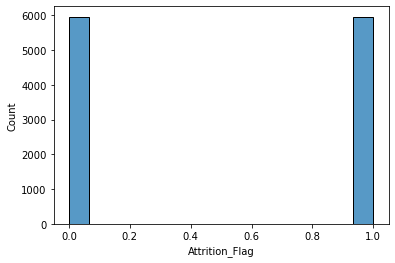

In [33]:
sns.histplot(x= clase_entrena_balance)

## 5.2 Customer_Age

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

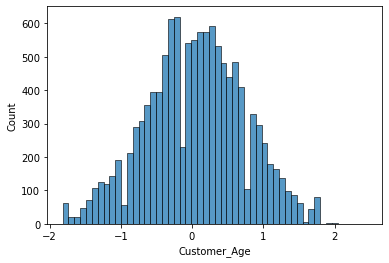

In [34]:
sns.histplot(x= datos_entrena_balance["Customer_Age"])



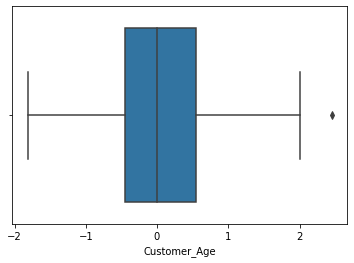

In [35]:
sns.boxplot(x=datos_entrena_union["Customer_Age"])
plt.show()

## 5.3 Gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

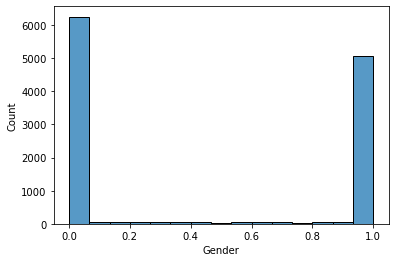

In [36]:
sns.histplot(x= datos_entrena_balance["Gender"])

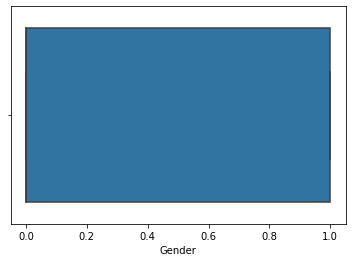

In [37]:
sns.boxplot(x=datos_entrena_balance["Gender"])
plt.show()

## 5.4 Dependent_count

<AxesSubplot:xlabel='Dependent_count', ylabel='Count'>

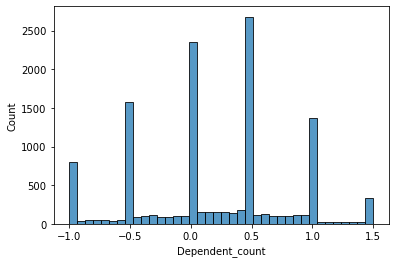

In [38]:
sns.histplot(x= datos_entrena_balance["Dependent_count"])

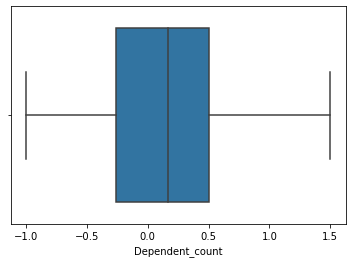

In [39]:
sns.boxplot(x=datos_entrena_balance["Dependent_count"])
plt.show()

## 5.5 Months_on_book

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

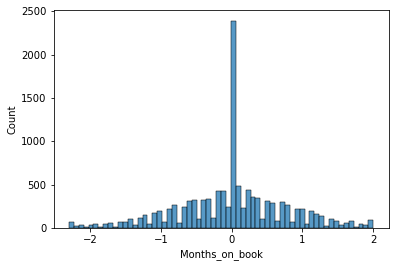

In [40]:
sns.histplot(x= datos_entrena_balance["Months_on_book"])

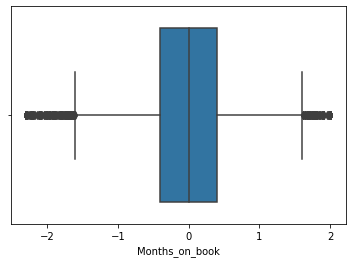

In [41]:
sns.boxplot(x=datos_entrena_balance["Months_on_book"])
plt.show()

## 5.6 Total_Relationship_Count


<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

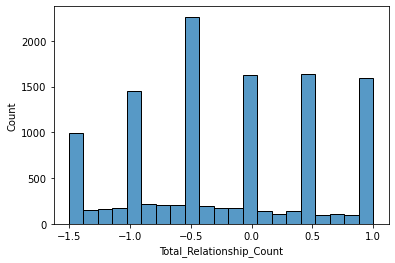

In [42]:
sns.histplot(x= datos_entrena_balance["Total_Relationship_Count"])

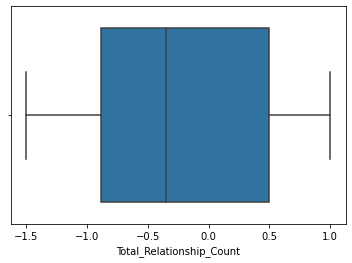

In [43]:
sns.boxplot(x=datos_entrena_balance["Total_Relationship_Count"])
plt.show()

# 5.7 Months_Inactive_12_mon

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

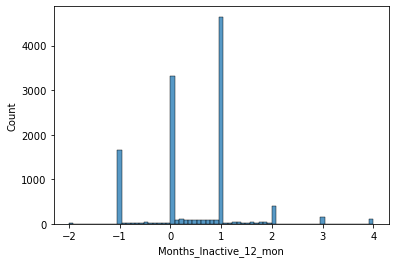

In [44]:
sns.histplot(x= datos_entrena_balance["Months_Inactive_12_mon"])

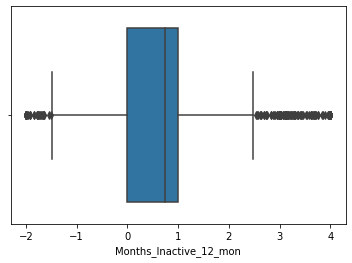

In [45]:
sns.boxplot(x=datos_entrena_balance["Months_Inactive_12_mon"])
plt.show()

### 5.7.1 Clean outliers for training data 

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/196071495.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing ot

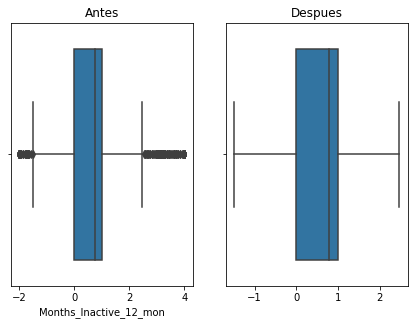

In [46]:

test = datos_entrena_balance["Months_Inactive_12_mon"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Antes")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,1,test)
test = np.where(test<min_value,1,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("Despues")
plt.show()

datos_entrena_balance["Months_Inactive_12_mon"] = test

### 5.7.2 Clean outliers for test data 

Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/2188050830.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

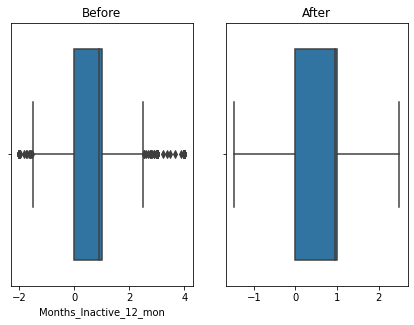

In [47]:
test = datos_test_balance["Months_Inactive_12_mon"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,1,test)
test = np.where(test<min_value,1,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

datos_test_balance["Months_Inactive_12_mon"] = test

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

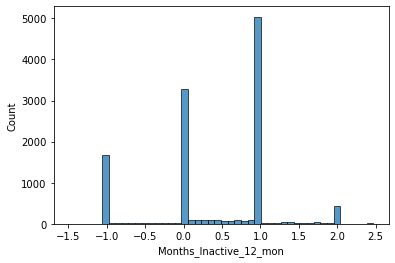

In [48]:
sns.histplot(x= datos_entrena_balance["Months_Inactive_12_mon"])

## 5.8 Contacts_Count_12_mon

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

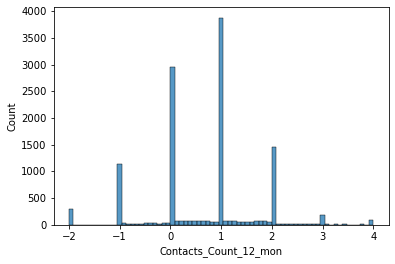

In [49]:
sns.histplot(x= datos_entrena_balance["Contacts_Count_12_mon"])

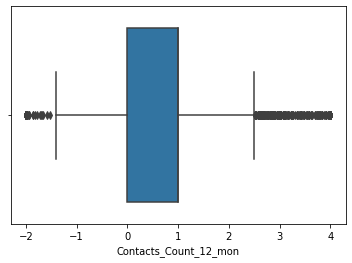

In [50]:
sns.boxplot(x=datos_entrena_balance["Contacts_Count_12_mon"])
plt.show()

### 5.8.1 Clean outliers for training data

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/2749215939.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

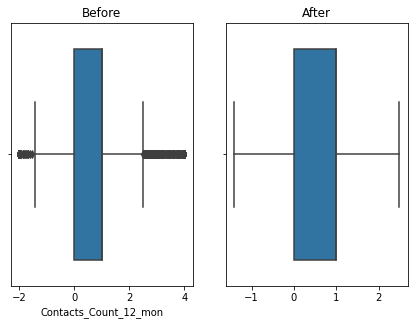

In [51]:
test = datos_entrena_balance["Contacts_Count_12_mon"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,1,test)
test = np.where(test<min_value,1,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Contacts_Count_12_mon"] = test

### 5.8.2 Clean outliers for test data

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/1175493994.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)


Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

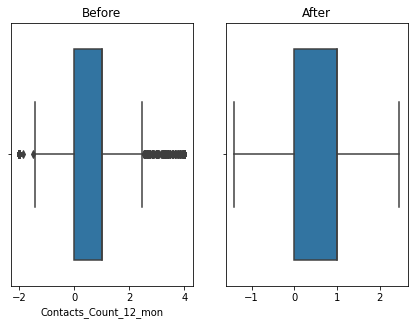

In [52]:
test = datos_test_balance["Contacts_Count_12_mon"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,1,test)
test = np.where(test<min_value,1,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_test_balance["Contacts_Count_12_mon"] = test

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

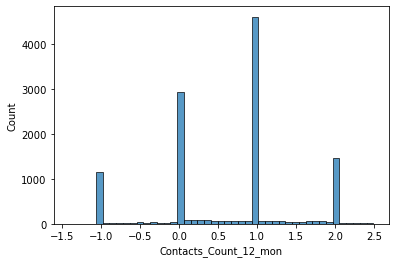

In [53]:
sns.histplot(x= datos_entrena_balance["Contacts_Count_12_mon"])

## 5.9 Credit_Limit

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

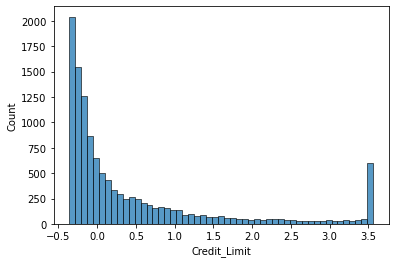

In [54]:
sns.histplot(x= datos_entrena_balance["Credit_Limit"])

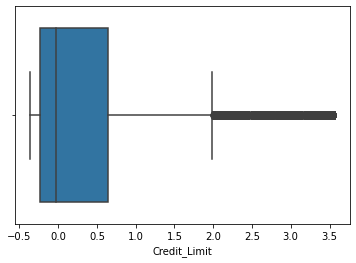

In [55]:
sns.boxplot(x=datos_entrena_balance["Credit_Limit"])
plt.show()

## 5.9.1 Clean outliers for training data 

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/2954457470.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

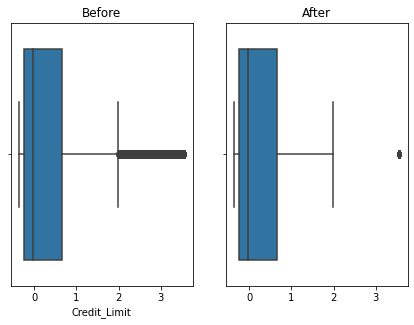

In [56]:

test = datos_entrena_balance["Credit_Limit"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Credit_Limit"] = test

## 5.9.2 Clean outliers for test data 

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/736323333.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)


Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

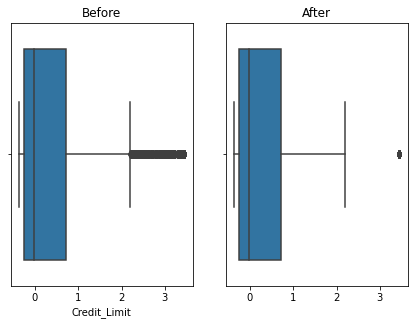

In [57]:
test = datos_test_balance["Credit_Limit"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_test_balance["Credit_Limit"] = test

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

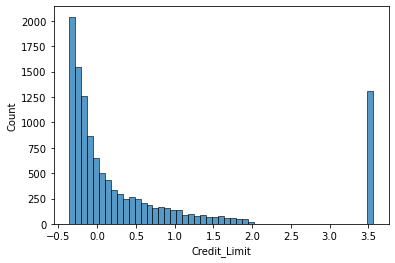

In [58]:
sns.histplot(x= datos_entrena_balance["Credit_Limit"])

## 5.10 Total_Revolving_Bal

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

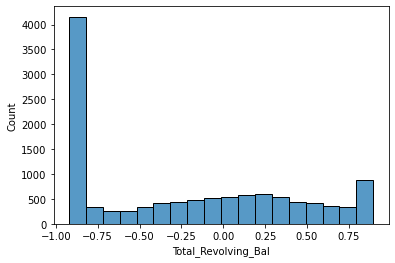

In [59]:
sns.histplot(x= datos_entrena_balance["Total_Revolving_Bal"])

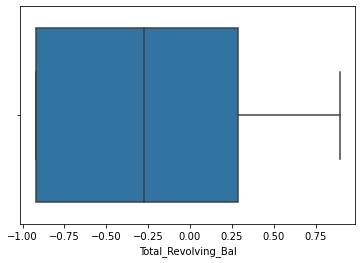

In [60]:
sns.boxplot(x=datos_entrena_balance["Total_Revolving_Bal"])
plt.show()

## 5.11 Avg_Open_To_Buy

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

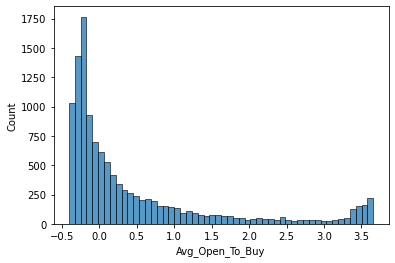

In [61]:
sns.histplot(x= datos_entrena_balance["Avg_Open_To_Buy"])

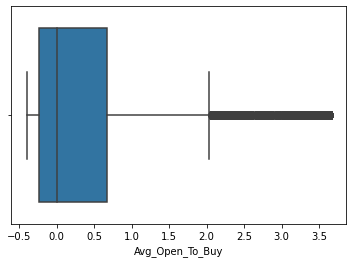

In [62]:
sns.boxplot(x=datos_entrena_balance["Avg_Open_To_Buy"])
plt.show()

## 5.12 Total_Amt_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

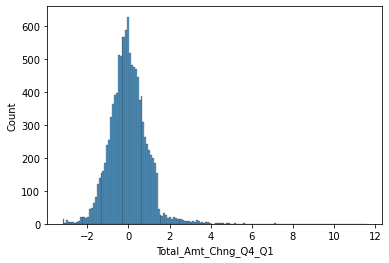

In [63]:
sns.histplot(x= datos_entrena_balance["Total_Amt_Chng_Q4_Q1"])

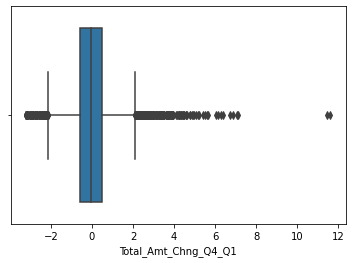

In [64]:
sns.boxplot(x=datos_entrena_balance["Total_Amt_Chng_Q4_Q1"])
plt.show()

### 5.12.1 Clean outliers for training data 

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/4248765183.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

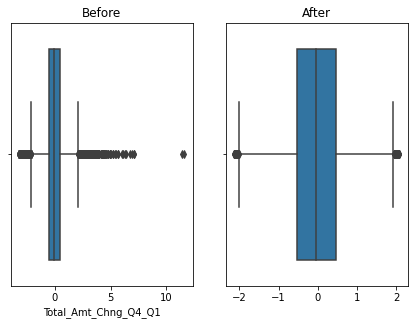

In [65]:

test = datos_entrena_balance["Total_Amt_Chng_Q4_Q1"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Amt_Chng_Q4_Q1"] = test

### 5.12.2 Clean outliers for test data 

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/48031338.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)


Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

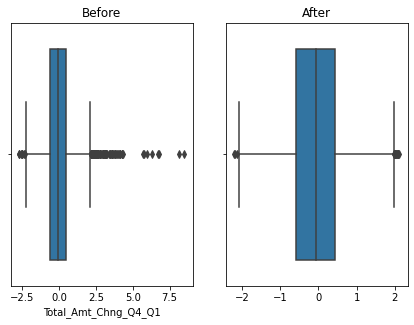

In [66]:

test = datos_test_balance["Total_Amt_Chng_Q4_Q1"]
moda=0
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_test_balance["Total_Amt_Chng_Q4_Q1"] = test

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

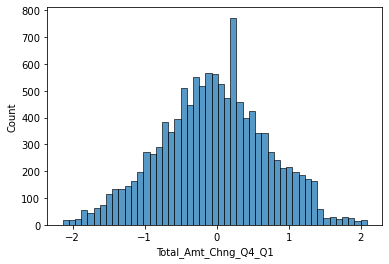

In [67]:
sns.histplot(x= datos_entrena_balance["Total_Amt_Chng_Q4_Q1"])

## 5.13 Total_Trans_Amt

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

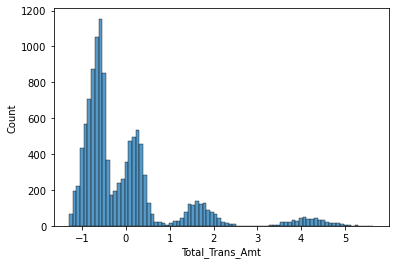

In [68]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Amt"])

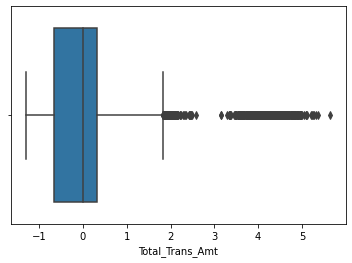

In [69]:
sns.boxplot(x=datos_entrena_union["Total_Trans_Amt"])
plt.show()

### 5.13.1 Clean outliers for training data 

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/3444365047.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

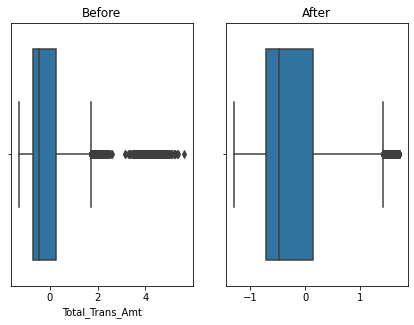

In [70]:
test = datos_entrena_balance["Total_Trans_Amt"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Trans_Amt"] =test

### 5.13.2 Clean outliers for training data 

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/4083666883.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)


Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

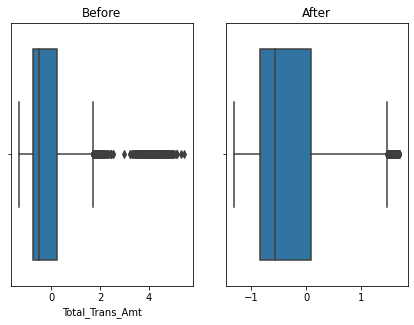

In [71]:

test = datos_test_balance["Total_Trans_Amt"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)


print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_test_balance["Total_Trans_Amt"] =test

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

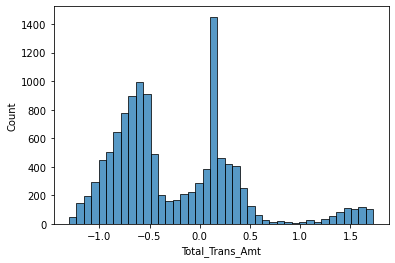

In [72]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Amt"])

## 5.14 Total_Trans_Ct

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

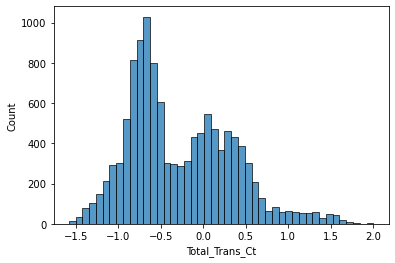

In [73]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Ct"])

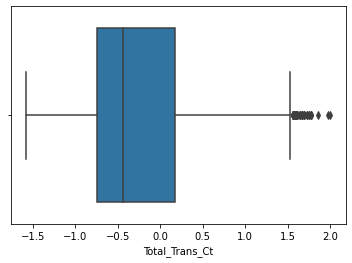

In [74]:
sns.boxplot(x=datos_entrena_balance["Total_Trans_Ct"])
plt.show()

### 5.15.1 Clean outliers training data

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/1302144813.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

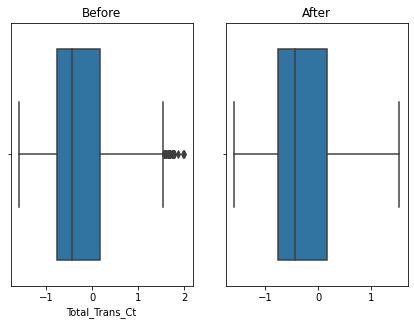

In [75]:

test = datos_entrena_balance["Total_Trans_Ct"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Trans_Ct"] = test


### 5.15.2 Clean outliers test data

C:\PROGRA~1\KMSpico\temp/ipykernel_15144/3021030444.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)


Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warni

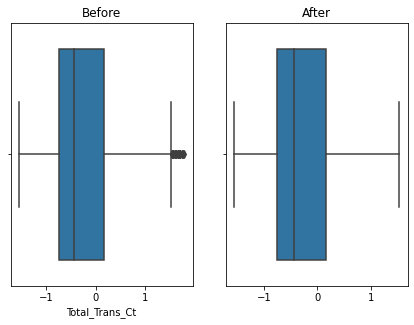

In [76]:
test = datos_test_balance["Total_Trans_Ct"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")


Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_test_balance["Total_Trans_Ct"] = test

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

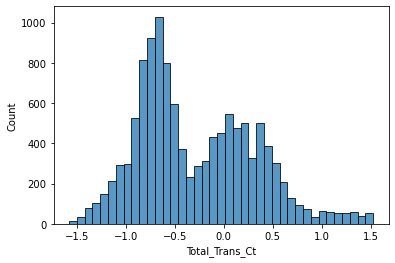

In [77]:
sns.histplot(x= datos_entrena_balance["Total_Trans_Ct"])

## 5.16 Total_Ct_Chng_Q4_Q1

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

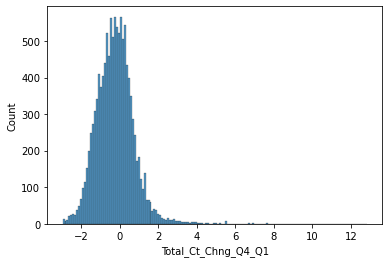

In [78]:
sns.histplot(x= datos_entrena_balance["Total_Ct_Chng_Q4_Q1"])

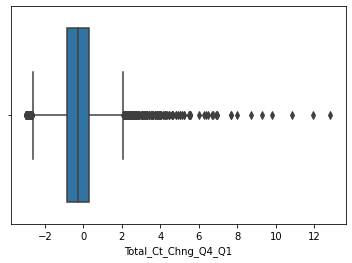

In [79]:
sns.boxplot(x=datos_entrena_balance["Total_Ct_Chng_Q4_Q1"])
plt.show()

### 5.16.1 Clean outlires for training data

Previous Shape With Outlier:  (11916,)
Shape After Removing Outliers: (11916,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/2740324162.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

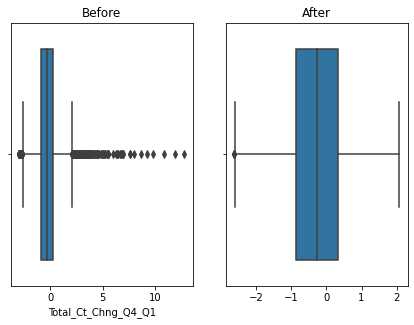

In [80]:

test = datos_entrena_balance["Total_Ct_Chng_Q4_Q1"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)

print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_entrena_balance["Total_Ct_Chng_Q4_Q1"] = test

### 5.16.2 Clean outlires for test data

Previous Shape With Outlier:  (5084,)
Shape After Removing Outliers: (5084,)


C:\PROGRA~1\KMSpico\temp/ipykernel_15144/1725283728.py:4: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing o

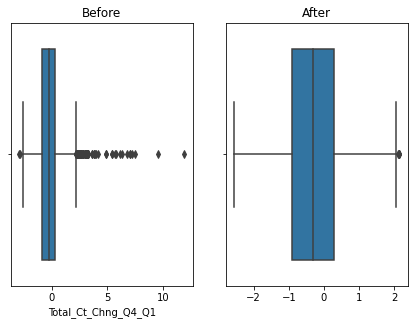

In [81]:
test = datos_test_balance["Total_Ct_Chng_Q4_Q1"]
moda=stat.mode(test)
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",test.shape)
sns.boxplot(test,orient='v',ax=axes[0])
axes[0].title.set_text("Before")

Q3 = test.quantile(0.75) #max
Q1 = test.quantile(0.25) #min
IQR = Q3 - Q1
min_value = Q1 - (1.5*IQR)
max_value = Q3 + (1.5*IQR)

test = np.where(test>max_value,moda,test)
test = np.where(test<min_value,moda,test)

print("Shape After Removing Outliers:", test.shape)

sns.boxplot(test,orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
datos_test_balance["Total_Ct_Chng_Q4_Q1"] = test

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

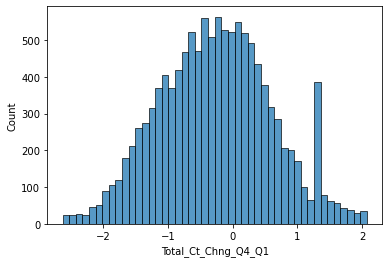

In [82]:
sns.histplot(x= datos_entrena_balance["Total_Ct_Chng_Q4_Q1"])

## 5.17 Avg_Utilization_Ratio

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

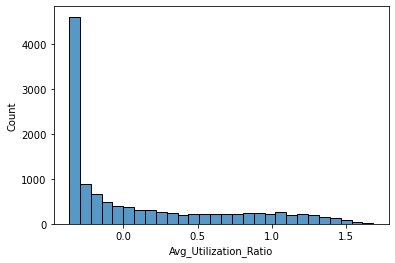

In [83]:
sns.histplot(x= datos_entrena_balance["Avg_Utilization_Ratio"])


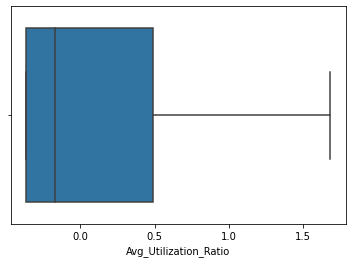

In [84]:
sns.boxplot(x=datos_entrena_balance["Avg_Utilization_Ratio"])
plt.show()

## 5.18 Correlations

In [85]:
matriz = datos_entrena_balance.corr(method="spearman")

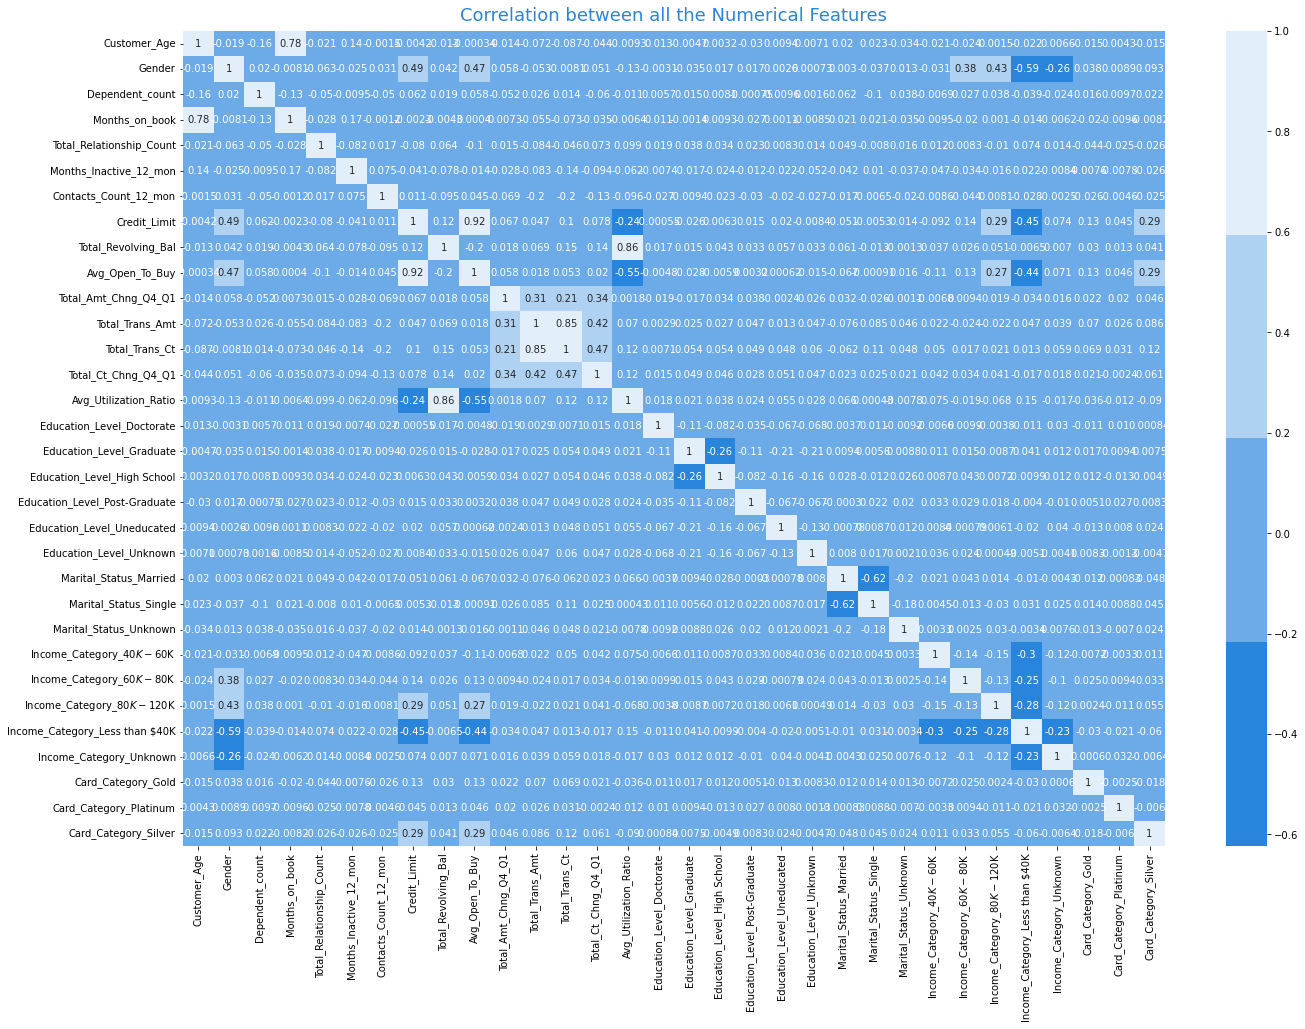

In [86]:
plt.figure(figsize=[22,15])
plt.title("Correlation between all the Numerical Features", size=18, pad=10, color='#2985dc')
sns.heatmap(matriz, cmap=['#2985dc', '#6cabe7','#b0d2f2','#e2effa'], annot=True)
plt.show()

In [87]:
def matriz_de_confusion(clases_reales, clases_predichas, titulo):
   
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    precision = precision_score(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)
    f1 = f1_score(clases_reales, clases_predichas,average="macro")

    
    plt.figure(figsize=(4, 4))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Existing ", "1 : Attrited "]) 
    plt.matshow(matriz, cmap="summer", vmin=0, vmax=20, fignum=1)
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("True\nnegative", "False\npositive"), 
                 ("False\nnegative", "True\npositive"))
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1_Macro: %0.2f" % f1, fontsize=20)
    
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.show()

# 6.  Applying models

## 6.1 Logistict Regresion

### 6.1.1 Call model

In [88]:
logistict = LogisticRegression()

### 6.1.2 Training model

In [89]:
logistict.fit(datos_entrena_balance, clase_entrena_balance) 

LogisticRegression()

### 6.1.3 Make predictions

In [90]:
pred_logistict = logistict.predict(datos_test_balance)

### 6.1.3 Metrics

#### 6.1.3.1 Score

In [91]:
accuracy = logistict.score(datos_test_balance, clase_test_balance) 
accuracy

0.8809992132179386

#### 6.1.3.2 Accuracy_score

In [92]:
acc = accuracy_score(clase_test_balance,pred_logistict)
acc

0.8809992132179386

#### 6.1.3.3 F1_score

In [93]:
f1_macro_logistict = f1_score(clase_test_balance,pred_logistict, average="macro")
f1_macro_logistict

0.8809941992110414

#### 6.1.3.4 Classification_report

In [94]:
x_logistict= classification_report(clase_test_balance,pred_logistict)
print(x_logistict)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      2542
           1       0.89      0.87      0.88      2542

    accuracy                           0.88      5084
   macro avg       0.88      0.88      0.88      5084
weighted avg       0.88      0.88      0.88      5084



#### 6.1.3.5 CV

In [95]:
scores_logistict = cross_val_score(logistict,datos_entrena_balance, clase_entrena_balance, cv=5, scoring="f1_macro")

In [96]:
print(scores_logistict)

[0.78666117 0.90549966 0.9084463  0.91480462 0.91141066]


In [97]:
scores_logistict.mean()

0.8853644807529474

#### 6.1.3.6 Confusion matrix

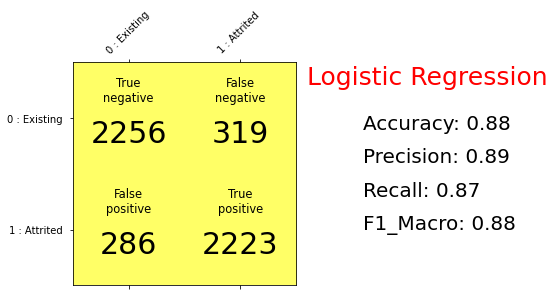

In [98]:
matriz_de_confusion(clase_test_balance,pred_logistict,"Logistic Regression")

#### 6.1.3.7 ROC curve

In [99]:
r_probs = [0 for _ in range(len(clase_test_balance))]
logistic_probs = logistict.predict_proba(datos_test_balance)

In [100]:
logistic_probs = logistic_probs[:, 1]

In [101]:
r_auc = roc_auc_score(clase_test_balance, r_probs)
logistic_auc = roc_auc_score(clase_test_balance, logistic_probs)

In [102]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regresion : AUROC = %.3f' % (logistic_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regresion : AUROC = 0.943


In [103]:
r_fpr, r_tpr, _ = roc_curve(clase_test_balance, r_probs)
logistic_fpr, logistic_tpr, _ = roc_curve(clase_test_balance, logistic_probs)

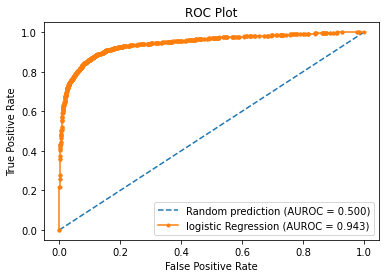

In [104]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic Regression (AUROC = %0.3f)' % logistic_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 6.2 Decision Tree

### 6.2.1 Call model

In [105]:
dec = DecisionTreeClassifier()

### 6.2.2 Training model

In [106]:
dec.fit(datos_entrena_balance, clase_entrena_balance)

DecisionTreeClassifier()

### 6.2.3 Make predictions

In [107]:
pred_dec = dec.predict(datos_test_balance)

### 6.2.4 Metrics

#### 6.2.4.1 Score

In [108]:
accuracy_dec = dec.score(datos_test_balance, clase_test_balance)
accuracy

0.8809992132179386

#### 6.2.4.2 Accuracy_score

In [109]:
acc_dec = accuracy_score(clase_test_balance,pred_dec)
acc_dec

0.8658536585365854

#### 6.2.4.3 F1_score

In [110]:
f1_dec = f1_score(clase_test_balance,pred_dec, average= "macro")
f1_dec


0.8652929632744604

#### 6.2.4.4 Classification_report

In [111]:
x_dec= classification_report(clase_test_balance,pred_dec)
print(x_dec)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2542
           1       0.92      0.80      0.86      2542

    accuracy                           0.87      5084
   macro avg       0.87      0.87      0.87      5084
weighted avg       0.87      0.87      0.87      5084



#### 6.2.4.5 CV

In [112]:
scores_tree = cross_val_score(dec,datos_entrena_balance, clase_entrena_balance, cv=5, scoring="f1_macro")

In [113]:
print(scores_tree)

[0.90130655 0.93282451 0.94123636 0.95130882 0.95340821]


In [114]:
scores_tree.mean()

0.9360168902117874

#### 6.2.4.6 Confusion matrix

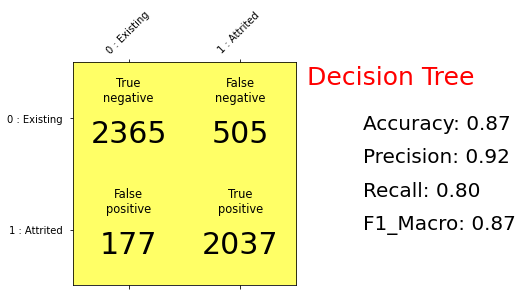

In [115]:
matriz_de_confusion(clase_test_balance,pred_dec,"Decision Tree")

#### 6.2.4.7 Roc curve

In [116]:
r_probs = [0 for _ in range(len(clase_test_balance))]
dec_probs = dec.predict_proba(datos_test_balance)

In [117]:
rf_probs = dec_probs[:, 1]

In [118]:
r_auc = roc_auc_score(clase_test_balance, r_probs)
dec_auc = roc_auc_score(clase_test_balance, rf_probs)

In [119]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision Tree: AUROC = %.3f' % (dec_auc))

Random (chance) Prediction: AUROC = 0.500
Decision Tree: AUROC = 0.866


In [120]:
r_fpr, r_tpr, _ = roc_curve(clase_test_balance, r_probs)
dec_fpr, dec_tpr, _ = roc_curve(clase_test_balance, rf_probs)

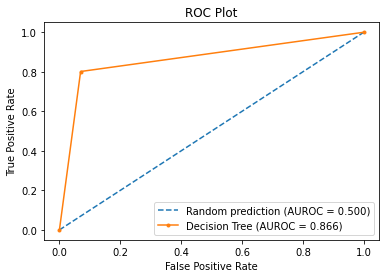

In [121]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dec_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 6.3 Xgboost

### 6.3.1 Call model

In [122]:
xgb = xgb.XGBClassifier()

### 6.3.2 Training model

In [123]:
xgb.fit(datos_entrena_balance, clase_entrena_balance)

C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 6.3.3 Make predictions

In [124]:
pred_xgb = xgb.predict(datos_test_balance)

### 6.3.4 Metrics

#### 6.3.4.1 Score

In [125]:
accuracy_xgb = xgb.score(datos_test_balance, clase_test_balance)
accuracy_xgb

0.9451219512195121

#### 6.3.4.2 Accuracy_score

In [126]:
acc_xgb = accuracy_score(clase_test_balance,pred_xgb)
acc_xgb

0.9451219512195121

#### 6.3.4.3 F1_score

In [127]:
f1_xgb = f1_score(clase_test_balance,pred_xgb, average= "macro")
f1_xgb

0.9450967140729645

#### 6.3.4.4 Classification_report

In [128]:
x_xgb= classification_report(clase_test_balance,pred_xgb)
print(x_xgb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2542
           1       0.97      0.92      0.94      2542

    accuracy                           0.95      5084
   macro avg       0.95      0.95      0.95      5084
weighted avg       0.95      0.95      0.95      5084



#### 6.3.4.5 CV

In [129]:
scores_xgb = cross_val_score(xgb,datos_entrena_balance, clase_entrena_balance, cv=5, scoring="f1_macro")
warnings.filterwarnings("ignore")

[15:24:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:11] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:16] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
print(scores_xgb)

[0.84972996 0.99034762 0.98489044 0.98950828 0.9853106 ]


In [131]:
scores_xgb.mean()

0.9599573795693017

In [132]:
print(scores_xgb.mean(),scores_tree.mean(),scores_logistict.mean())

0.9599573795693017 0.9360168902117874 0.8853644807529474


#### 6.3.4.6 Confusion matrix

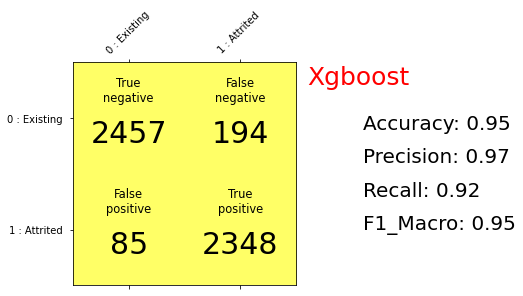

In [133]:
matriz_de_confusion(clase_test_balance,pred_xgb,"Xgboost")

#### 6.3.4.7 Roc curve

In [134]:
r_probs = [0 for _ in range(len(clase_test_balance))]
xgb_probs = xgb.predict_proba(datos_test_balance)

In [135]:
xgb_probs = xgb_probs[:, 1]

In [136]:
r_auc = roc_auc_score(clase_test_balance, r_probs)
xgb_auc = roc_auc_score(clase_test_balance, xgb_probs)

In [137]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Xgbosst: AUROC = %.3f' % (xgb_auc))

Random (chance) Prediction: AUROC = 0.500
Xgbosst: AUROC = 0.984


In [138]:
r_fpr, r_tpr, _ = roc_curve(clase_test_balance, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(clase_test_balance, xgb_probs)

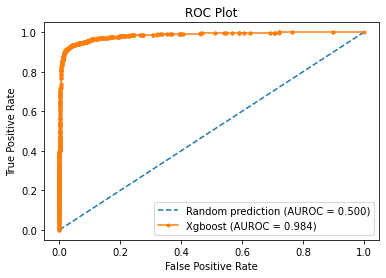

In [139]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 6.4 All roc curves together

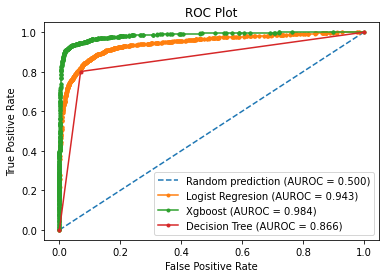

In [140]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logist Regresion (AUROC = %0.3f)' % logistic_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dec_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
# Show legend
plt.legend() # 
# Show plot
plt.show()

# 7.Tunning Xgboost

## 7.1 Parameters

In [141]:
parametros = {
                'max_depth' : [2,4,6,8,10,12],
                'subsample' : [0.1, 0.3, 0.5,0.8,1],
                'colsample_bylevel' : [0.1,0.4,0.6,1],
                'colsample_bytree'  : [0.1,0.4,0.6,1],
                'min_child_weight' : [0.1,0.5,1],
                'n_estimators' : [10, 100,200, 500, 800],
                'learning_rate' : [0.01,0.3,0.6]
}

In [142]:
parametros2 = {
                'max_depth' : [2,3,5,10,15],
                'subsample' : [0.1, 0.3, 0.5,0.8,1],
                'min_child_weight' : [1,2,3,4],
                'n_estimators' : [100,500, 900, 1100,1500],
                'learning_rate' : [0.05,0.1,0.15,0.20],
                #'booster' : ['gbtree','gblinear']
}

## 7.2 Apply RandomizedSearchCV

In [143]:
warnings.filterwarnings("ignore")
random_cv = RandomizedSearchCV(xgb,parametros2,cv=5,scoring="f1_macro", n_iter=5,random_state=42)
#random_cv = RandomizedSearchCV(xgb,parametros2,cv=5,scoring="neg_mean_absolute_error", n_iter=50,n_jobs =4,verbose=5,return_train_score=True,random_state=42)
fit_obj = random_cv.fit(datos_entrena_balance, clase_entrena_balance)
print(fit_obj.cv_results_['mean_test_score'])
best_model = fit_obj.best_estimator_



[15:24:19] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:20] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:24:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

## 7.3 Training best model

In [144]:
best_model.fit(datos_entrena_balance, clase_entrena_balance)
print(best_model.score(datos_entrena_balance, clase_entrena_balance))
print(best_model.score(datos_test_balance, clase_test_balance))

[15:26:43] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
0.9427616050354052


In [145]:
pred_xgb_best = best_model.predict(datos_test_balance)

## 7.4 Metrics for the best model

### 7.4.1 Confusion matriz

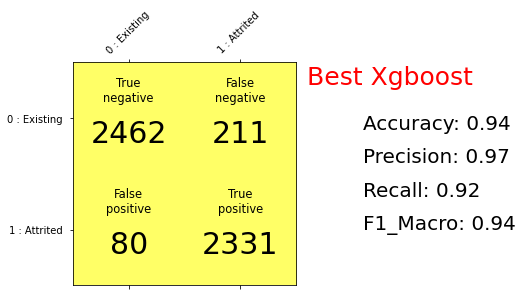

In [146]:
matriz_de_confusion(clase_test_balance,pred_xgb_best,"Best Xgboost")

### 7.4.2 Roc curve

Random (chance) Prediction: AUROC = 0.500
Xgbosst: AUROC = 0.988


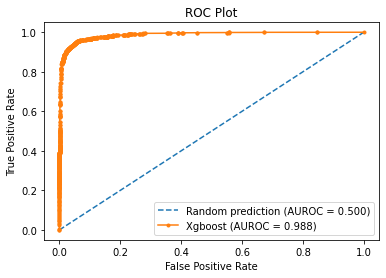

In [147]:
r_probs = [0 for _ in range(len(clase_test_balance))]
xgb_probs = best_model.predict_proba(datos_test_balance)
xgb_probs = xgb_probs[:, 1]
r_auc = roc_auc_score(clase_test_balance, r_probs)
xgb_auc = roc_auc_score(clase_test_balance, xgb_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Xgbosst: AUROC = %.3f' % (xgb_auc))

r_fpr, r_tpr, _ = roc_curve(clase_test_balance, r_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(clase_test_balance, xgb_probs)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Xgboost (AUROC = %0.3f)' % xgb_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## 7.4 Features importances

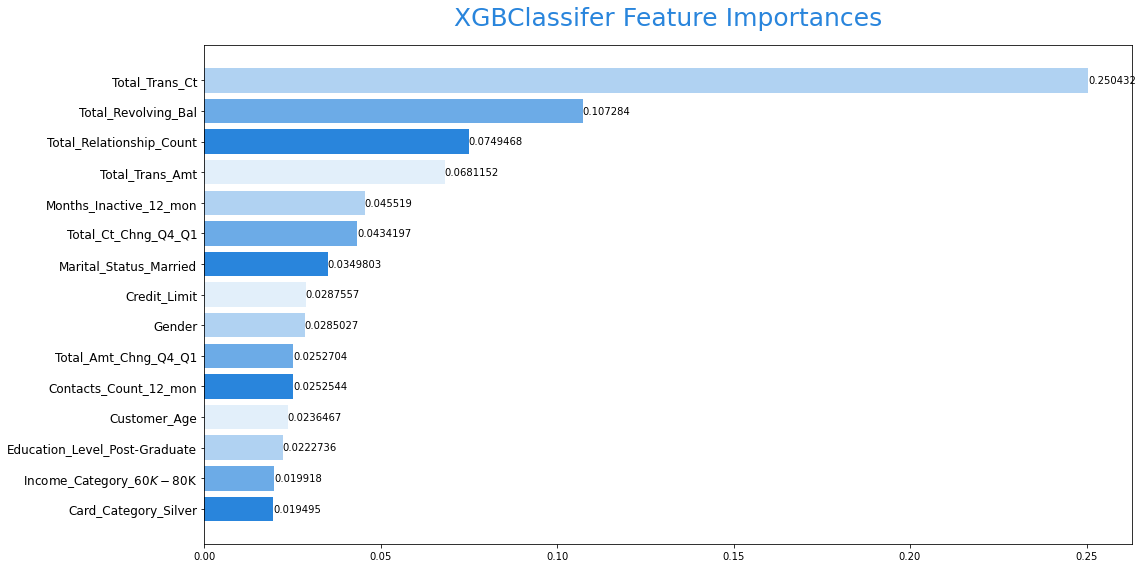

In [148]:
features_to_plot = 15

importances = best_model.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(datos_entrena_balance.columns )[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y_ticks, values, color=['#2985dc', '#6cabe7','#b0d2f2','#e2effa'])
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks)
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='#2985dc')
ax.bar_label(ax.containers[0], size="10")
fig.tight_layout()
plt.grid(False)
plt.show()